<a href="https://colab.research.google.com/github/felippe-ribeiro/AulasIAFIAP/blob/main/Case_PCA_(Principal_Component_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução sobre a Análise de Componente Principal


---


##O que é o PCA?
Na área de análise de dados, frequentemente nos deparamos com o desafio de lidar com uma grande quantidade de informações. Quando iniciamos um projeto de análise, especialmente na fase de exploração, muitas vezes nos deparamos com um grande número de características interessantes que podem ser utilizadas para treinar modelos, criar dashboards ou identificar padrões. Surge a pergunta: quais características são realmente relevantes para a análise?

É nesse contexto que entra o PCA (Análise de Componentes Principais), uma técnica introduzida por Karl Pearson em 1909. O principal objetivo do PCA é reduzir a complexidade de conjuntos de dados com várias variáveis, ajudando a identificar as características mais essenciais, ou seja, aquelas que capturam a maior parte da variação nos dados (ou o quão diferentes os dados estão da média).

Em resumo, o PCA possibilita uma representação mais concisa dos dados, eliminando informações menos cruciais e mantendo as que têm maior importância para a análise e interpretação. É importante notar que o PCA não exclui diretamente as características que estamos analisando, mas sim nos auxilia a focar nas mais relevantes para nossos objetivos.

#Utilizando o PCA com um Conjunto de Dados de Exemplo em Python

In [2]:
# Vamos então trabalhar com um exemplo clássico
# Importando dataset Iris

from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# A seguir, iremos separar todas as colunas na lista de recursos para uma variavel X e a variavel  destino para y

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df[features].values
y = df['Target'].values

#Porque padronizar as variáveis?
A padronização de variáveis é um processo crucial ao aplicar a Análise de Componentes Principais (PCA), uma técnica sensível à escala. Se as unidades de medida das variáveis diferem, aquelas com magnitudes mais elevadas podem distorcer a análise.

Por exemplo, em um conjunto de dados com distâncias em metros e valores em milhares, a segunda variável, devido à sua amplitude maior, pode ter uma influência desproporcional na variabilidade total durante o PCA. A padronização, frequentemente realizada por meio da normalização z, é um procedimento que ajusta as variáveis de um conjunto de dados para que todas possuam uma média de zero e um desvio padrão de um.

A normalização z transforma cada variável de forma que sua distribuição seja centrada na média zero e escalada pelo desvio padrão.

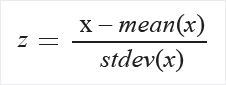

In [4]:
from sklearn.preprocessing import StandardScaler
# Normalizando os dados utilizando o standardScaler
# Padroniza as features removendo a média e escala a variância a uma unidade
# Isso significa que para cada feature, a média seria 0, e o desvia padrao seria 1

X = StandardScaler().fit_transform(X)
#Visualizando nossos dados pradronizados
df_padronizado = pd.DataFrame(data=X, columns=features)
display(df_padronizado.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Agora, importaremos o PCA usando sklearn e projetamos nossos dados originais, que possuem 4 dimensões, em 2 dimensões (ou também chamados de componentes principais).

In [5]:
# Importando PCA da biblioteca sklearn
from sklearn.decomposition import PCA
# Instanciando o pca e a quantidade de componentes que desejamos obter
pca = PCA(n_components=2)
# Aplicando PCA nas nossas features
principalComponents = pca.fit_transform(X)

In [6]:
# Criando um novo dataFrame para visualizarmos como ficou nossos dados reduzidos com o PCA
df_pca = pd.DataFrame(data= principalComponents,
                      columns = ['PC1', 'PC2'])

target = pd.Series(iris['target'], name='target')
result_df = pd.concat([df_pca, target], axis=1)
result_df

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


#Métrica estatística sobre qualidade da minha redução de componentes

> A técnica do PCA parece muito interessante! No entanto, como posso ter certeza de que o PCA não está omitindo informações essenciais para o meu modelo?

Para esclarecer essa preocupação, utilizamos uma técnica chamada "Razão de Variância Explicada" (Explained Variance Ratio). Essa métrica estatística quantifica o quanto de variação em um conjunto de dados pode ser atribuído a cada um dos componentes principais (que são criados pelo PCA) em relação à média. Isso é fundamental, pois nos permite classificar os componentes por ordem de importância e concentrar nossa atenção nos mais significativos ao interpretar os resultados da análise.

A variância explicada é uma ferramenta que ajuda a escolher quantas dimensões devem ser mantidas em um conjunto de dados reduzido. Além disso, ela também pode ser usada para avaliar a qualidade de um modelo de aprendizado de máquina. Em geral, um modelo com uma alta variância explicada tende a ter um bom poder de previsão, enquanto um modelo com uma baixa variância explicada pode não ser tão preciso. No entanto, é importante lembrar que a interpretação depende da pergunta que estamos tentando responder com os dados.

** Vamos olhar agora como ficou a variabilidade de cada componente principal, ou seja, o quanto cada coluna gerada a partir do PCA estão próximos/distantes da média dos nossos dados. **


In [7]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\nTotal de Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100,2))

Variance of each component: [0.72962445 0.22850762]

Total de Variance Explained: 95.81




> O que significam esses valores?

Se você tem um PC1 de 0.72962445, isso significa que o primeiro componente principal da sua análise é responsável por aproximadamente 72.96% da variância nos seus dados. Em outras palavras, esse único componente principal captura cerca de 72.96% da informação ou "estrutura" dos seus dados em termos de variância. Os restantes da variância são capturados pelos outros componentes principais (PC2, PC3, etc.).

> Por que a soma não chega a 100% ?
A  razão pela qual não soma a 100% é devido à existência de mais componentes principais que explicam o restante da variância. No entanto, esses componentes adicionais são frequentemente desconsiderados na prática, pois contribuem muito pouco para a interpretação dos dados.

A ideia subjacente à PCA é reduzir a dimensionalidade dos seus dados, mantendo a maior parte da informação (variância). Portanto, geralmente é aceitável ignorar esses componentes adicionais se eles não contribuírem de forma significativa para a variância total.

> Mas como ele faz isso utilizando apenas a variância dos nossos dados ?

Imagine que você possui um conjunto de dados distribuídos no espaço. A Análise de Componentes Principais (PCA) equivale a encontrar a melhor linha reta onde você pode projetar esses pontos de forma que fiquem o mais próximos possível dessa linha. Essa linha é o que chamamos de primeiro componente principal. Se desejar adicionar outra dimensão, é possível encontrar a melhor linha reta que seja perpendicular à primeira, onde você pode projetar os pontos. Isso corresponderia ao segundo componente principal, e o processo continua para mais dimensões. Cada uma dessas "linhas" captura uma parte da "informação" contida nos seus dados, e isso é mensurado pela variância ao longo dessa linha.


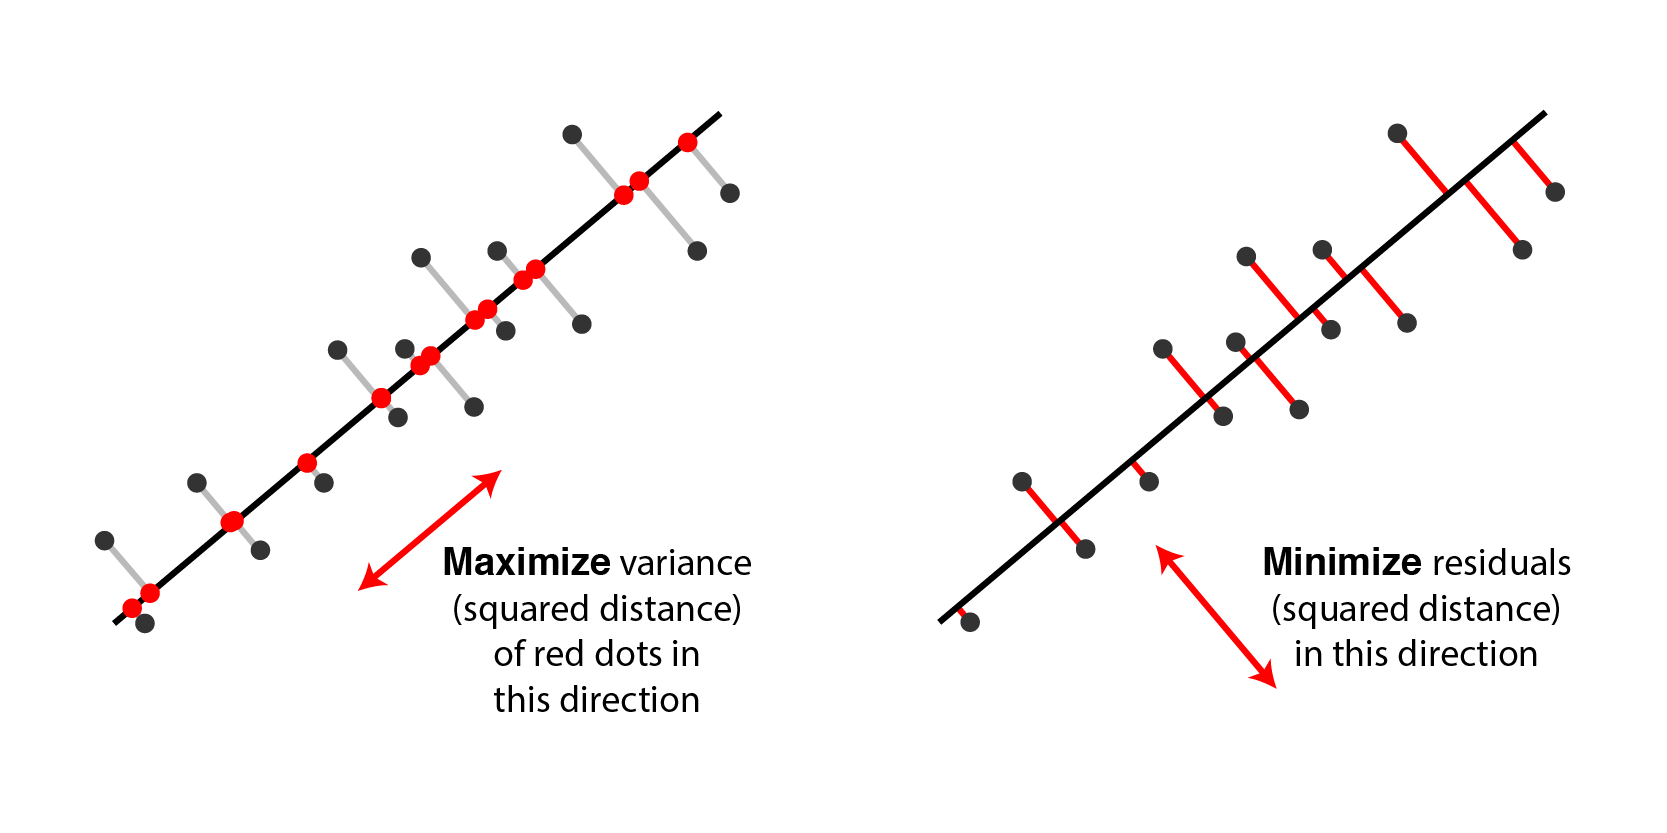

[referência do artigo utilizado para extrair tal imagem demonstrativa acima:](https://medium.com/apprentice-journal/pca-application-in-machine-learning-4827c07a61db)

***Vamos traduzir para um contexto matemático mais técnico!***

Essas linhas que representam as informações são denominadas autovetores. Cada autovetor possui um autovalor correspondente, que indica a quantidade de informação capturada por essa linha, ou seja, os pontos que ela atravessa.

Portanto, ao aplicar o PCA, nosso objetivo é identificar os melhores autovetores, onde cada autovalor representa uma determinada parcela de informação contida no nosso conjunto de dados.

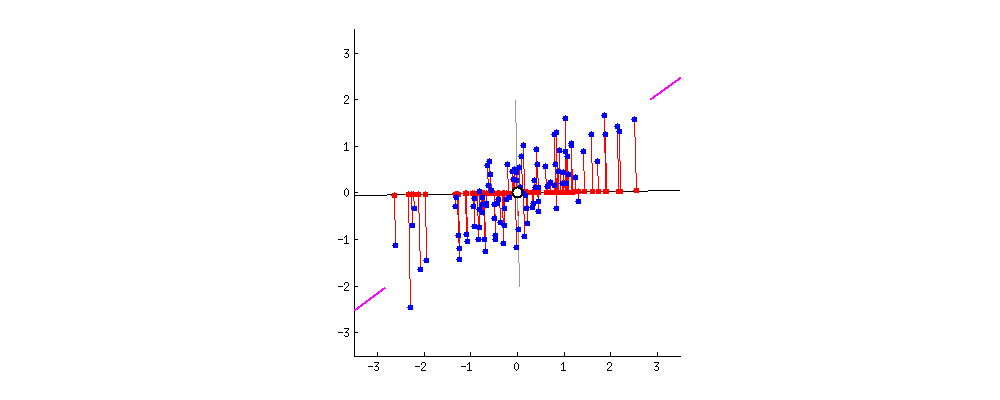

[referência do artigo utilizado para extrair tal imagem demonstrativa acima:](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)

## **Quantos componentes escolher para meu conjunto de dados?**
*Vamos visualizar como ficaria caso aumentasse meu número de componentes principais a variância explicada*

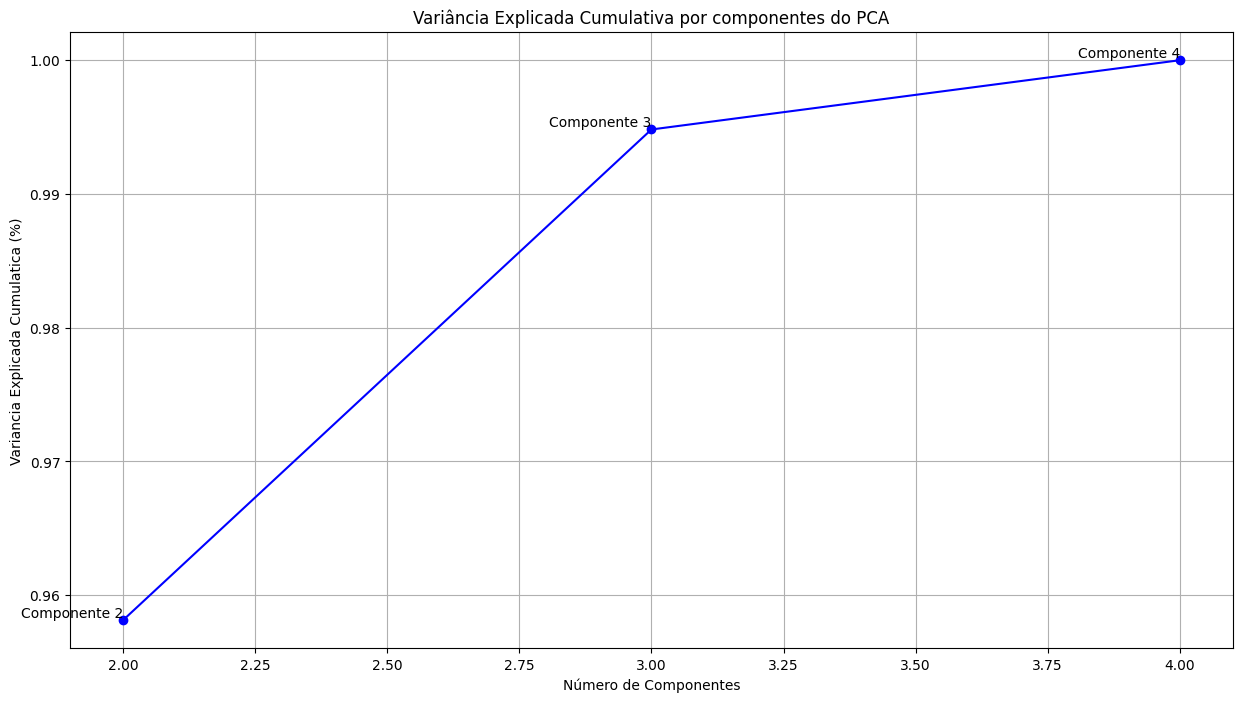

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Crie uma lista para armazenar os resultados
results = []
# Dados de exemplo (substitua pelo seu conjunto de dados X)
X = df_padronizado
# Faça um loop de 2 a 4 componentes
for n in range(2, 5):
  # crie o objeto PCA
  pca = PCA(n_components=n)
  # ajuste o PCA aos seus dados
  pca.fit(X)
  # Calcule a variância explicanda cumulatica e adicione aos resultados
  explained_variance = np.sum(pca.explained_variance_ratio_)
  results.append(explained_variance)
# criar o gráfico
plt.figure(figsize=(15, 8))
plt.plot(range(2, 5), results, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Variancia Explicada Cumulatica (%)')
plt.title('Variância Explicada Cumulativa por componentes do PCA')
plt.grid(True)
#Adicione rótulos aos pontos de dados
for i, (n_components, explained_var) in enumerate(zip(range(2, 5), results)):
  plt.text(n_components, explained_var, f'Componente {n_components}', ha='right', va='bottom')
plt.show()

Ao utilizar o PCA, você decide quantos componentes principais manter dos seus dados originais. A escolha depende de equilibrar a simplificação dos dados com a retenção da informação. Geralmente, você opta por um número que capture uma grande parte da variabilidade dos dados, como 95% ou 99%, evitando incluir componentes desnecessários. A decisão final depende das necessidades do seu projeto e dos objetivos específicos de análise.

#**Exercício prático**
####**Dataset sobre atributos dos jogadores no jogo eletrônico de esporte FIFA 2022**

[Informações sobre o dataset](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset/data)

In [ ]:
pd.set_option('display.max_columns', None)